# LOAD MINIST DATASET

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = pd.read_csv("train.csv")
y=x["label"]
x.drop("label",axis=1,inplace=True)
print(y)
x.head()

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


1


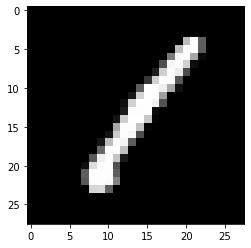

In [3]:
print(y[0])
plt.imshow(x.iloc[0].to_numpy().reshape(28,28),cmap="gray")
plt.show()

# 2D Visualizing using PCA

In [5]:
labels = y.head(15000)
data = x.head(15000)

print("the shape of sample data = ", data.shape)

the shape of sample data =  (15000, 784)


In [6]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [7]:
covar_matrix = np.matmul(standardized_data.T , standardized_data) #covariance

In [8]:
from scipy.linalg import eigh 

# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(782,783))

In [11]:
print(values) #eigen values
print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

[435532.55785282 605719.29173629]
Shape of eigen vectors =  (2, 784)
Updated shape of eigen vectors =  (784, 2)


In [24]:
data_2d = np.matmul(standardized_data,vectors)
data_2d

array([[-5.5586608 , -5.04355835],
       [ 6.19363477, 19.30527806],
       [-1.90987794, -7.67877525],
       ...,
       [-2.14793723, -1.50726893],
       [ 3.20412249, -6.53731291],
       [-6.87896871, -1.25625388]])

In [26]:
dataframe = pd.DataFrame({"1st_principal":data_2d[:,:1].flatten(),"2nd_principal":data_2d[:,1:].flatten(),"label":labels})
#we flatten because its 2-d array we convert to 1d array

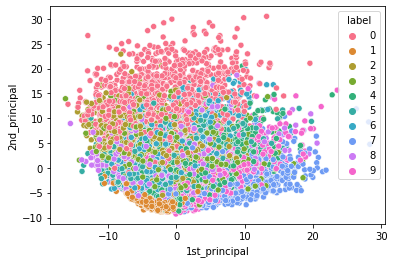

In [35]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.scatterplot(data=dataframe,hue="label",x="1st_principal",y="2nd_principal",palette=sns.color_palette("husl", 10))
plt.show()

In [34]:
sns.color_palette("husl", 10)

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8616090647292522, 0.536495730113334, 0.19548899031476086),
 (0.6804189127793346, 0.6151497514677574, 0.19405452111445337),
 (0.46810256823426105, 0.6699492535792404, 0.1928958739904499),
 (0.20125317221201128, 0.6907920815379025, 0.47966761189275336),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.2197995660828324, 0.6625157876850336, 0.7732093159317209),
 (0.433280341176423, 0.6065273407962815, 0.9585467098271748),
 (0.8004936186423958, 0.47703363533737203, 0.9579547196007522),
 (0.962272393509669, 0.3976451968965351, 0.8008274363432775)]

# PCA using Scikit-Learn

In [54]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2) #since we want 2-d 2 eigen vectos we give n_components=2

In [55]:
pca_data = pca.fit_transform(standardized_data)#sample_data is column satandardized data

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (15000, 2)


In [56]:
labels.to_numpy().reshape(-1,1).shape

(15000, 1)

In [57]:
pca_data = np.hstack((pca_data, labels.to_numpy().reshape(-1,1)))
pca_data.shape

(15000, 3)

In [60]:
pca_dataframe=pd.DataFrame({"1st_principal":pca_data[:,0:1].flatten(),"2nd_principal":pca_data[:,1:2].flatten(),\
                            "label":pca_data[:,2:].flatten()})
pca_dataframe.head()

,1st_principal,2nd_principal,label
0,-5.043599,-5.559461,1.0
1,19.305311,6.193507,0.0
2,-7.678744,-1.909321,1.0
3,-0.464851,5.525948,4.0
4,26.644296,6.366357,0.0


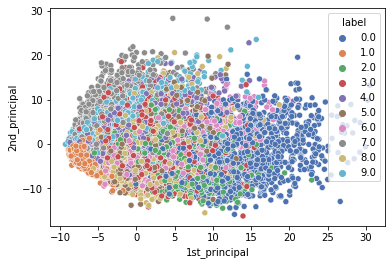

In [63]:
warnings.filterwarnings('ignore')
sns.scatterplot(data=pca_dataframe,hue="label",x="1st_principal",y="2nd_principal",palette=sns.color_palette("deep", 10))
plt.show()